<a href="https://colab.research.google.com/github/LuisPedroMM/Algoritmo-de-busqueda/blob/main/ALGORITMODEBUSQUEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== DEFINICIÓN DEL GRAFO ===


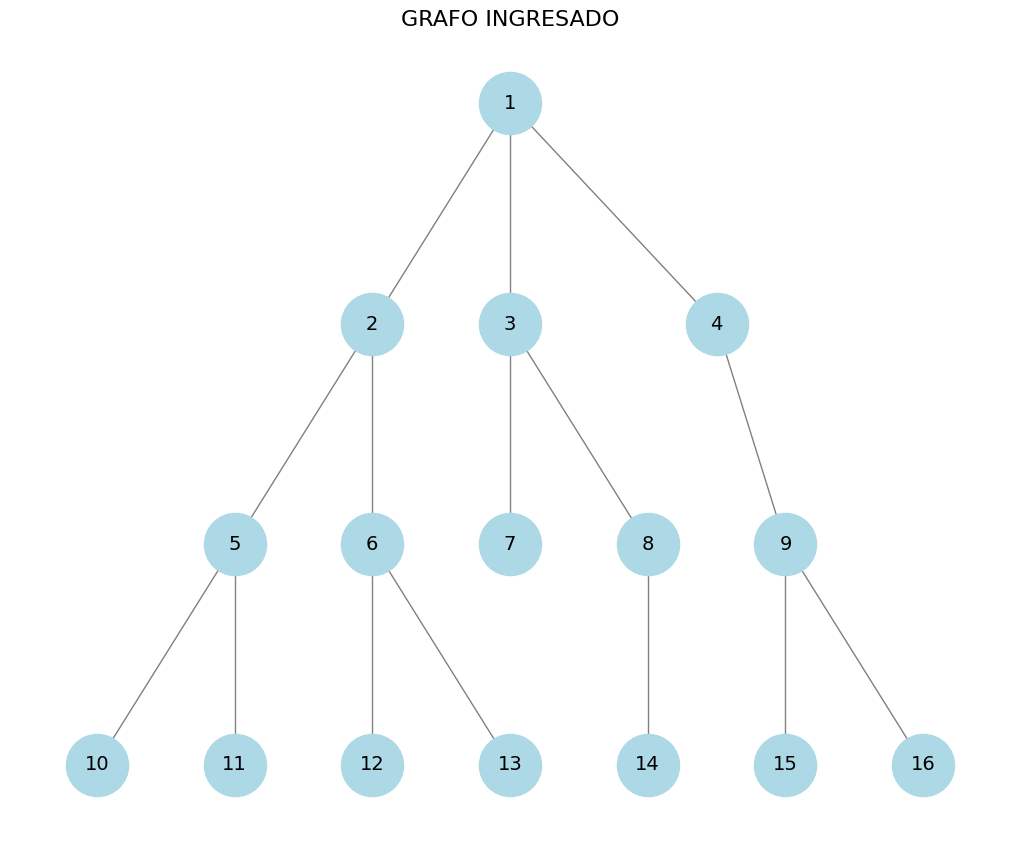


=== NUEVA BÚSQUEDA ===

Recorrido completo por BFS:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7

Camino más corto de '1' a '7':
1 -> 3 -> 7

=== NUEVA BÚSQUEDA ===

Recorrido completo por BFS:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14

Camino más corto de '1' a '14':
1 -> 3 -> 8 -> 14

=== NUEVA BÚSQUEDA ===

Recorrido completo por BFS:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12

Camino más corto de '1' a '12':
1 -> 2 -> 6 -> 12

=== NUEVA BÚSQUEDA ===

Recorrido completo por BFS:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16

Camino más corto de '1' a '16':
1 -> 4 -> 9 -> 16

=== NUEVA BÚSQUEDA ===
El nodo '0' no existe en el grafo. Intenta nuevamente.
El nodo '20' no existe en el grafo. Intenta nuevamente.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from networkx.drawing.nx_pydot import graphviz_layout

# Algoritmo BFS
def bfs(graph, start, goal):
    visited = set()
    queue = deque([[start]])
    recorrido_completo = []

    while queue:
        path = queue.popleft()
        node = path[-1]
        recorrido_completo.append(node)

        if node == goal:
            return recorrido_completo, path

        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)

    return recorrido_completo, None

# Validación de nodos
def pedir_nodo(mensaje, nodos_validos):
    while True:
        nodo = input(mensaje).strip()
        if nodo in nodos_validos:
            return nodo
        print(f"El nodo '{nodo}' no existe en el grafo. Intenta nuevamente.")

# Dibuja el grafo jerárquicamente
def dibujar_grafo_hierarquico(G):
    try:
        pos = graphviz_layout(G, prog='dot')
    except:
        print("No se pudo usar 'graphviz_layout'. Usando 'spring_layout'.")
        pos = nx.spring_layout(G)

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=2000, font_size=14, arrows=False, edge_color='gray')
    plt.title("GRAFO INGRESADO", fontsize=16)
    plt.show()

# Programa principal
def main():
    print("=== DEFINICIÓN DEL GRAFO ===")
    num_edges = int(input("¿Cuántas aristas tiene el grafo? "))

    G = nx.Graph()

    for _ in range(num_edges):
        while True:
            try:
                u, v = input("Ingresa una arista (formato: nodo1 nodo2): ").split()
                G.add_edge(str(u), str(v))
                break
            except ValueError:
                print("Entrada inválida. Usa el formato: nodo1 nodo2")

    dibujar_grafo_hierarquico(G)

    nodos = list(G.nodes)

    while True:
        print("\n=== NUEVA BÚSQUEDA ===")
        start = pedir_nodo("Ingresa el nodo inicial: ", nodos)
        goal = pedir_nodo("Ingresa el nodo destino: ", nodos)

        recorrido, camino_optimo = bfs(G, start, goal)

        print("\nRecorrido completo por BFS:")
        print(" -> ".join(recorrido))

        if camino_optimo:
            print(f"\nCamino más corto de '{start}' a '{goal}':")
            print(" -> ".join(camino_optimo))
        else:
            print(f"\nNo existe un camino de '{start}' a '{goal}'.")

        repetir = input("\n¿Deseas realizar otra búsqueda? (s/n): ").strip().lower()
        if repetir != 's':
            print("Gracias por usar el programa.")
            break

if __name__ == "__main__":
    main()
